Step 1: Load Tips Dataset

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load tips dataset
df = sns.load_dataset('tips')
df.dropna(inplace=True)  # Remove missing values if any


In [2]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Step 2: Linear Model - Manual MSE and RMSE

In [3]:
m1, c1 = 0.1, -0.5
y_pred1 = df['total_bill'] * m1 + c1
mse1 = mean_squared_error(df['tip'], y_pred1)
rmse1 = np.sqrt(mse1)

print("MSE (m=0.1, c=-0.5):", mse1)
print("RMSE:", rmse1)


MSE (m=0.1, c=-0.5): 3.3474527991803273
RMSE: 1.8296045472124098


In [4]:
m2, c2 = -0.05, 0.1
y_pred2 = df['total_bill'] * m2 + c2
mse2 = mean_squared_error(df['tip'], y_pred2)
rmse2 = np.sqrt(mse2)

print("MSE (m=-0.05, c=0.1):", mse2)
print("RMSE:", rmse2)


MSE (m=-0.05, c=0.1): 18.046113486680326
RMSE: 4.248071737468698


Step 3: Logistic Regression - Predict Dinner or Lunch from Tips

In [5]:
# Encode Dinner=1, Lunch=0
df['time_binary'] = df['time'].map({'Dinner': 1, 'Lunch': 0})

m3, c3 = 0.07, -0.8
logits = df['tip'] * m3 + c3
probs = 1 / (1 + np.exp(-logits))
y_pred_class = (probs >= 0.5).astype(int)

precision = precision_score(df['time_binary'], y_pred_class)
recall = recall_score(df['time_binary'], y_pred_class)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.0
Recall: 0.0


c:\Users\pavan\OneDrive\Desktop\SAMSUNG\SAMSUNG-INNOVATION-CAMPUS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


 It's not ideal for precision and recall to be zero in Step 3. That usually means that the model is predicting only one class (likely all "Lunch" or all "Dinner") — in this case, likely all 0s (Lunch), which leads to:
 No true positives
 Hence, Precision = 0, Recall = 0

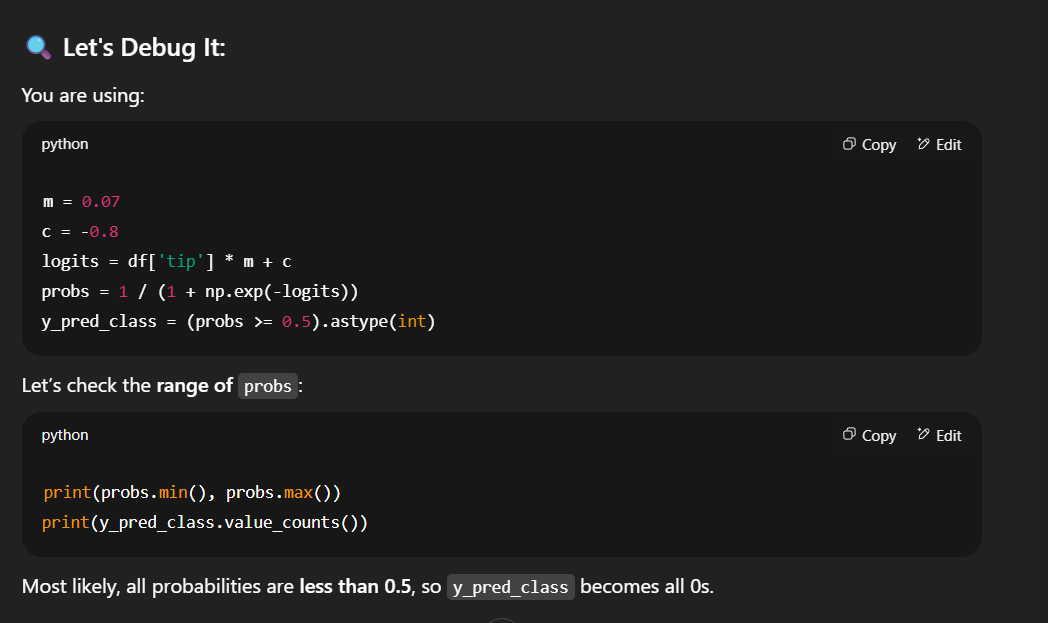

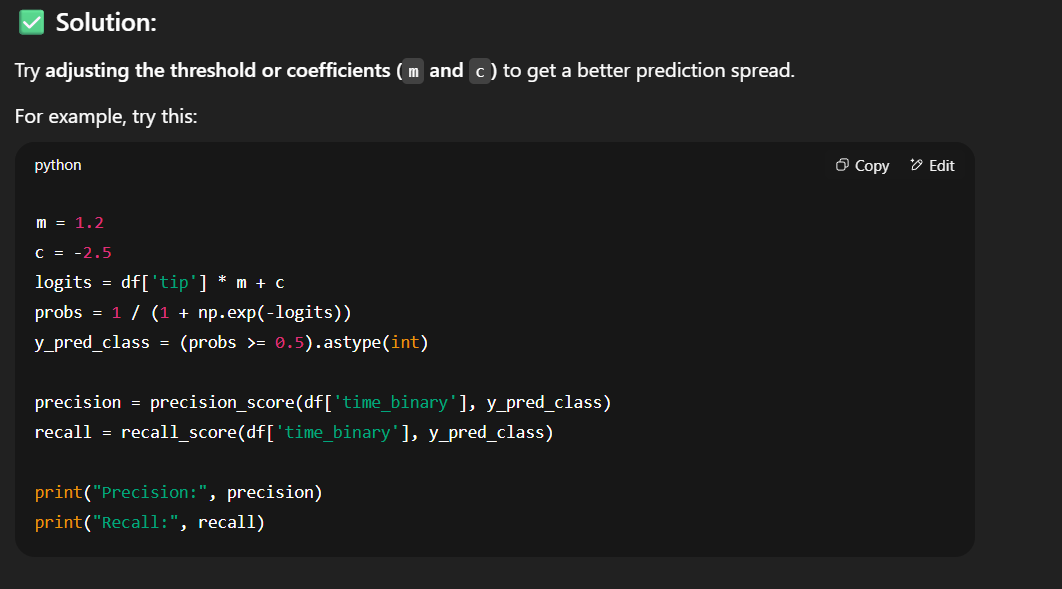

In [ ]:
#Logistic Regression
m = 1.2
c = -2.5
logits = df['tip'] * m + c
probs = 1 / (1 + np.exp(-logits))
y_pred_class = (probs >= 0.5).astype(int)

precision = precision_score(df['time_binary'], y_pred_class)
recall = recall_score(df['time_binary'], y_pred_class)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.775
Recall: 0.7045454545454546


Step 4: Simple Decision Tree Based on Tip

In [9]:
# Train a Decision Tree Classifier
# Custom rule: if tip > 1.2 then Dinner else Lunch
df['predicted_time'] = np.where(df['tip'] > 1.2, 'Dinner', 'Lunch')
df


,total_bill,tip,sex,smoker,day,time,size,time_binary,predicted_time
0,16.99,1.01,Female,No,Sun,Dinner,2,1,Lunch
1,10.34,1.66,Male,No,Sun,Dinner,3,1,Dinner
2,21.01,3.50,Male,No,Sun,Dinner,3,1,Dinner
3,23.68,3.31,Male,No,Sun,Dinner,2,1,Dinner
4,24.59,3.61,Female,No,Sun,Dinner,4,1,Dinner
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,Dinner
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,Dinner
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,Dinner
242,17.82,1.75,Male,No,Sat,Dinner,2,1,Dinner


Step 5: Decision Tree Classifier - Predict Time from tip, total_bill, size

Precision: 0.7359550561797753
Recall: 0.7443181818181818


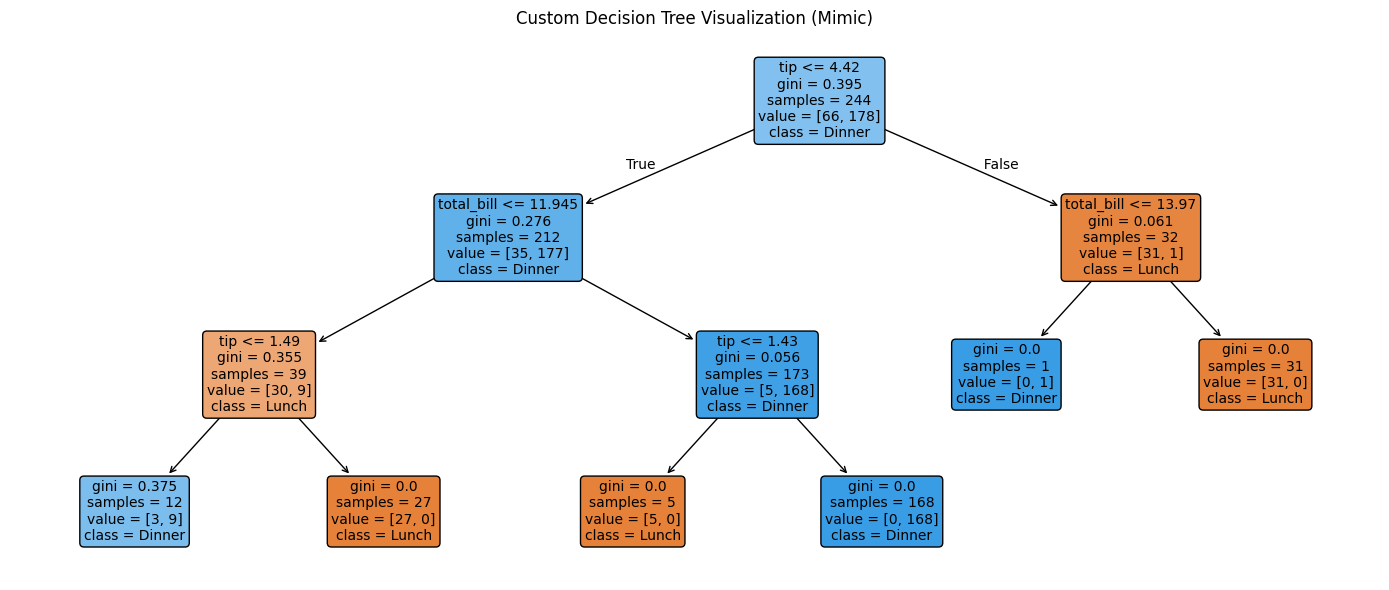

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score

# Load tips dataset
df = sns.load_dataset('tips')
df['time_binary'] = df['time'].map({'Dinner': 1, 'Lunch': 0})  # Dinner=1, Lunch=0

# Custom logic as per your tree diagram
def custom_decision_tree(row):
    tip = row['tip']
    bill = row['total_bill']
    if tip < 1.5:
        return 1 if bill < 10 else 0
    elif tip < 4.5:
        return 0 if bill < 12 else 1
    else:
        return 0 if bill > 19 else 1

# Apply logic and store predictions
df['tree_pred'] = df.apply(custom_decision_tree, axis=1)

# Evaluate precision and recall
precision = precision_score(df['time_binary'], df['tree_pred'])
recall = recall_score(df['time_binary'], df['tree_pred'])

print("Precision:", precision)
print("Recall:", recall)

# Fit a DecisionTreeClassifier for visualization only
df['label'] = df['tree_pred']
X = df[['tip', 'total_bill']]
y = df['label']

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(14, 6))
plot_tree(clf, feature_names=['tip', 'total_bill'], class_names=['Lunch', 'Dinner'],
          filled=True, rounded=True, fontsize=10)
plt.title("Custom Decision Tree Visualization (Mimic)")
plt.tight_layout()
plt.show()


In [14]:
#Accuracy of the custom decision tree
accuracy = (df['tree_pred'] == df['time_binary']).mean()
print("Accuracy of the custom decision tree:", accuracy)


Accuracy of the custom decision tree: 0.6229508196721312


In [13]:
df

,total_bill,tip,sex,smoker,day,time,size,time_binary,tree_pred,label
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,1,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,1,1


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define vectors a, b, c
a = np.array([5, 2, 3])
b = np.array([-2, -1, 5])
c = np.array([1, 3, -2])

# i) a · b (Dot product)
dot_ab = np.dot(a, b)

# ii) |a| (Magnitude of a)
mag_a = np.linalg.norm(a)

# iii) |b| (Magnitude of b)
mag_b = np.linalg.norm(b)

# iv) cos(θ) between a and b
cos_theta = dot_ab / (mag_a * mag_b)

# v) a + 2b
sum_vec = a + 2 * b

# vi) a - b
sub_vec = a - b

# vii) (2a + b) · (a - b)
expr1 = 2 * a + b
expr2 = a - b
result_vii = np.dot(expr1, expr2)

# viii) A vector ⊥ to a
perp_to_a = np.array([1, 0, 5/3])

# ix) A vector ⊥ to both b and c => cross product
perp_to_c_b = np.cross(c, b)

# x) A vector ⊥ to (a+b+c)
sum_abc = a + b + c
# Find a vector perpendicular to sum_abc, e.g., cross with a
perp_to_sum_abc = np.cross(sum_abc, a)

# xi) A vector parallel to b
parallel_to_b = b.copy()

# xii) A vector parallel to b but ⊥ to c
# Remove the projection of b onto c from b
proj_b_on_c = (np.dot(b, c) / np.dot(c, c)) * c
parallel_b_perp_c = b - proj_b_on_c

# Print all results
print("i) a · b =", dot_ab)
print("ii) |a| =", mag_a)
print("iii) |b| =", mag_b)
print("iv) cos(θ) =", cos_theta)
print("v) a + 2b =", sum_vec)
print("vi) a - b =", sub_vec)
print("vii) (2a + b) · (a - b) =", result_vii)
print("viii) A vector ⊥ to a =", perp_to_a)
print("ix) A vector ⊥ to both b and c =", perp_to_c_b)
print("x) A vector ⊥ to (a+b+c) =", perp_to_sum_abc)
print("xi) A vector parallel to b =", parallel_to_b)
print("xii) A vector parallel to b but ⊥ to c =", parallel_b_perp_c)



i) a · b = 3
ii) |a| = 6.164414002968976
iii) |b| = 5.477225575051661
iv) cos(θ) = 0.08885233166386386
v) a + 2b = [ 1  0 13]
vi) a - b = [ 7  3 -2]
vii) (2a + b) · (a - b) = 43
viii) A vector ⊥ to a = [1.         0.         1.66666667]
ix) A vector ⊥ to both b and c = [13 -1  5]
x) A vector ⊥ to (a+b+c) = [  0  18 -12]
xi) A vector parallel to b = [-2 -1  5]
xii) A vector parallel to b but ⊥ to c = [-0.92857143  2.21428571  2.85714286]


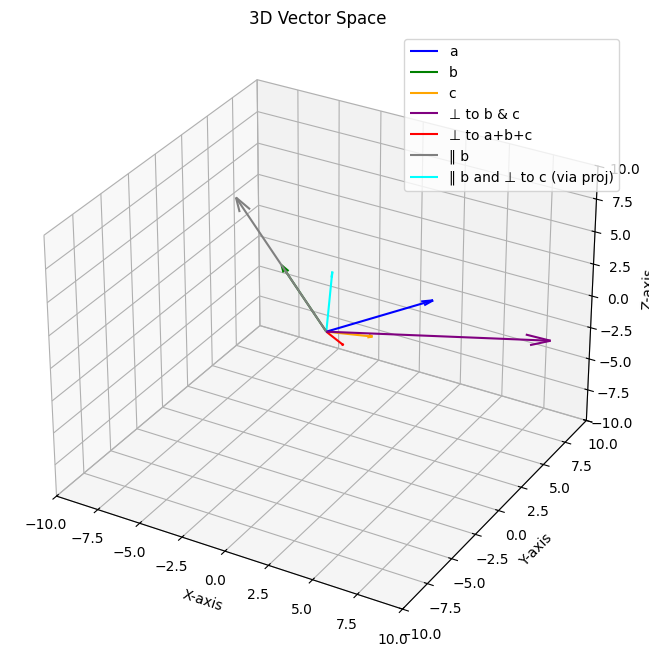

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define base vectors
a = np.array([5, 2, 3])
b = np.array([-2, -1, 5])
c = np.array([1, 3, -2])

# 1. Vector perpendicular to both b and c
v1 = np.cross(c, b)

# 2. Vector perpendicular to (a + b + c)
abc_sum = a + b + c
x, y = 1, 0
z = -(abc_sum[0]*x + abc_sum[1]*y) / abc_sum[2]
v2 = np.array([x, y, z])

# 3. Vector parallel to b
v3 = 2 * b

# 4. Component of b perpendicular to c
proj_bc = (np.dot(b, c) / np.dot(c, c)) * c
v4 = b - proj_bc  # This is perpendicular to c

# Set up 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

def plot_vector(ax, vec, color, label):
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=color, label=label, arrow_length_ratio=0.1)

# Plot original vectors
plot_vector(ax, a, 'blue', 'a')
plot_vector(ax, b, 'green', 'b')
plot_vector(ax, c, 'orange', 'c')

# Plot derived vectors
plot_vector(ax, v1, 'purple', '⊥ to b & c')
plot_vector(ax, v2, 'red', '⊥ to a+b+c')
plot_vector(ax, v3, 'gray', '‖ b')
plot_vector(ax, v4, 'cyan', '‖ b and ⊥ to c (via proj)')

# Decorate plot
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Vector Space')
ax.legend()
plt.show()

In [20]:
import gensim.downloader as api

model = api.load("glove-wiki-gigaword-100")

def getvector(word):
    vector = model[word]
    print("Vector for", word, ":\n", vector)

getvector("happiness")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Find top 5 words most similar to 'happiness'
similar_words = glove.most_similar('happiness', topn=5)
for word, score in similar_words:
    print(f"{word}: {score}")